# ENPH 213 - Week 10 Lab

In this lab, we will be working on numerically solving partial differential equations and continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab10, where LastName is your last name.  Submit that file to onQ.

For marking Parts 1-3 will be marked together (Weighted out of 10).

# Part 1

Write a function that solves Laplace's equation $\nabla^2 V = 0$ and plots the electric potential of a parallel  plate capacitor placed inside a conducting box as shown in the diagram below.  The top plate of the capacitor is held at +10 Volts while the bottom plate is held at ‐10 Volts.  The box is grounded (0 Volts). Use a grid with 1 mm spacing in both directions give a total array size of 41x41 points. You will need to use the relaxation method to solve for the potential $V$ and will have to determine the number of iterations that are required for your solution to converge.

Once solved, plot a filled contour plot of the potential in the region as well as the number of iterations required to converge.

Hint: When needed, solve the "ODE" equations with the plates as boundary conditions.

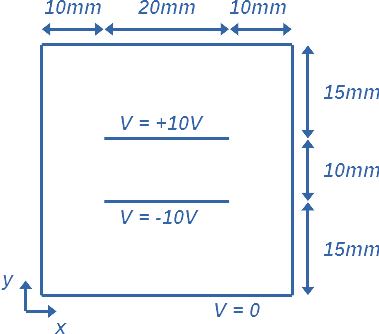

Good to go after 221 iterations!


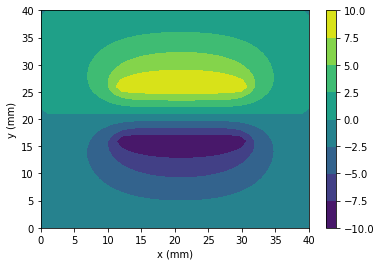

In [1]:
#Libraries
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'figure.max_open_warning': 0})

#x and y coordinates
x = np.arange(41)
y = np.arange(41)

#Function to solve the laplacian for the array
def Laplace(x,y):
    #Initial conditions and limits for the plates
    ybottom = 16
    ytop = 26
    xleft = 11
    xright = 31
    V1 = 1
    V2 = 2
    
    #Initialize the V array
    V = np.zeros((len(x),len(y)))
    MaxLoops = 1000
    
    #Loop thru each value up to MaxLoops times
    for loops in range(MaxLoops): 
        for j in range(1,len(y)-1):
            for i in range(1,len(x)-1):
                #Setting the top bar each time
                if (j == ytop and i < xright and i > xleft):
                    V[j,i] = 10
                
                #Setting the bottom bar each time
                elif (j == ybottom and i < xright and i > xleft):
                    V[j,i] = -10
                
                #Now, iterate the rest of the points
                else:
                    V[j,i] = (V[j+1,i] + V[j-1,i] + V[j,i+1] + V[j,i-1])/4
        
        #Now, checking to see if the iteration condition is met.
        if loops>200:
            V2 = V[int(len(x)//4),int(len(y)//2)]
            if abs(V2 - V1) < 0.001:
                break
            V1 = V2
    
    #Return the iterations
    print("Good to go after " + str(loops) + " iterations!")
    
    return V


#PLOTTING
VVals = Laplace(x,y)

fig = plt.figure()

#Plot our contour
contr = plt.contourf(x,y,VVals)
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
fig.colorbar(contr)

plt.show()

# Part 2

Plot the electric field of the configuration.  To do this, you can either use your function developed in Week 3 or you may also use Numpy's gradient() function.

Plot the electric field using a quiver plot as you did in Week 3.

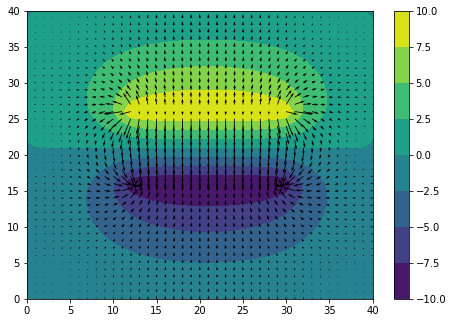

In [2]:
#Take the gradient
E = np.gradient(VVals)

#HERE, I AM TAKING THE OPPOSITE DIRECTION, AS IT ACCOUNTS FOR THE SWITCH WHICH COULD TAKE PLACE EARLIER (x and y are switched)
Ex = E[1]*-1
Ey = E[0]*-1

#Plot the quiver on top of the contour
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
contr2 = plt.contourf(x,y,VVals)
fig.colorbar(contr2)
q = ax.quiver(x,y,Ex,Ey)

plt.show()

# Part 3

Here, you will plot the effect of shaking the end of a rope using the wave equation.

$\Large \frac{\partial^2 u}{\partial x^2} = c^2 \frac{\partial^2 u}{\partial t^2} $

where $c$ is the speed of the wave, which we will set to 1.

For the initial conditions, set all $u$ displacement values equal to zero.  As the spatial boundary condition, set $u_(x_0) = u_(x_1) = \sin(t_j)$.

As with the heat conduction example, you will solve for $t_{j+1}$ from your equation.  However, because the time derivative is second order, you need to start on the third time step. 

Create an array $dispAll$ that can hold all calculated displacement values ($u$) for all positions and timesteps. 

Use a step of $h_t = 0.01$ in time and $h_x = 0.05$ in $x$, and use a range of time from 0 to 20, and a range of $x$ from 0 to 20.  Plot evey 100th graph to watch the wave move across the domain.

Repeat the above, but use a range of time from 0 to 40.  
**Question:  Does it look different?  If so, what is happening?**

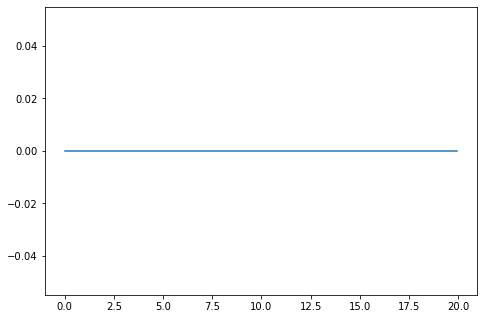

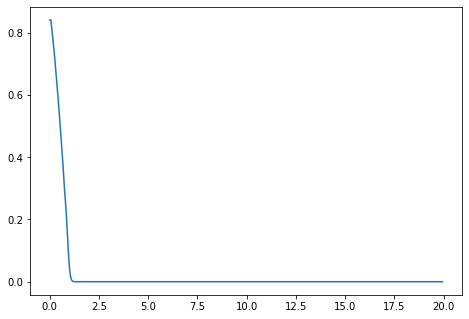

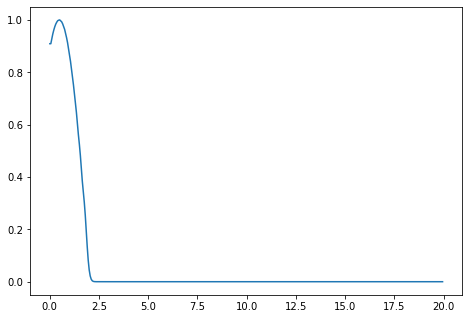

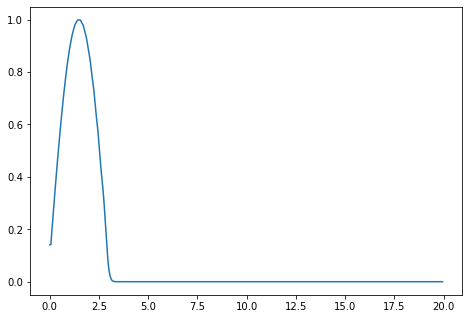

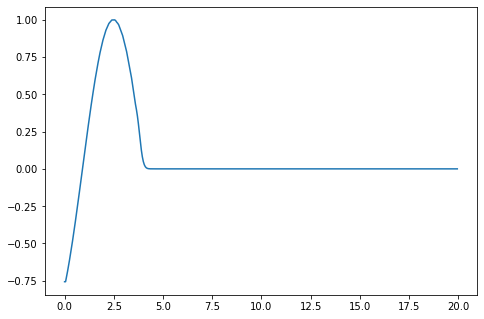

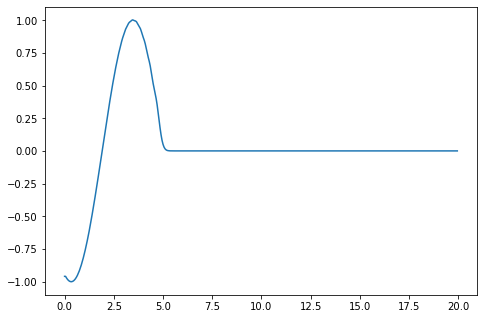

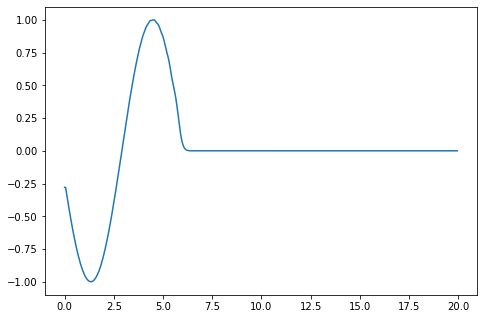

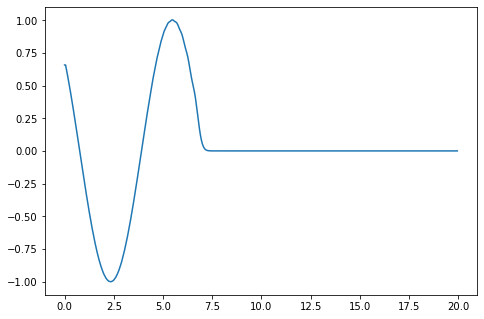

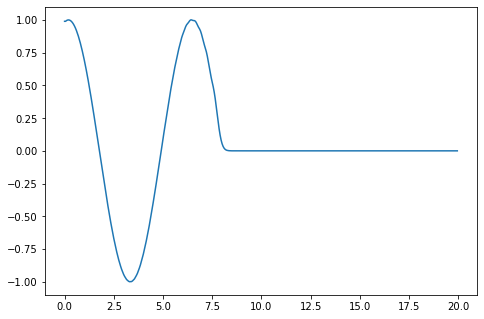

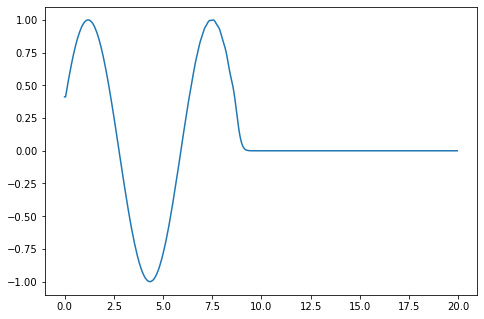

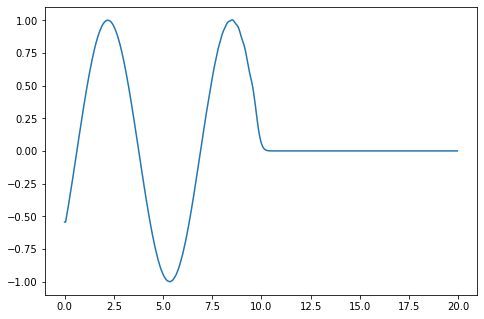

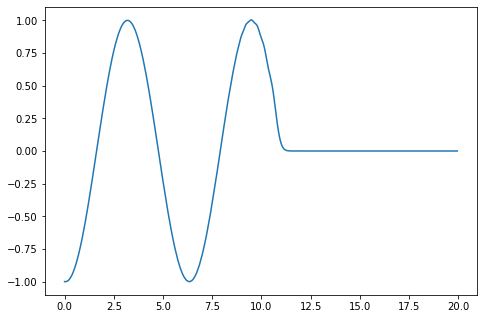

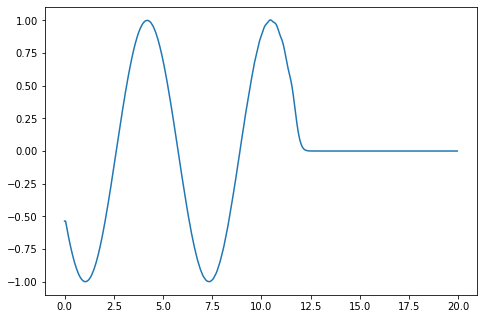

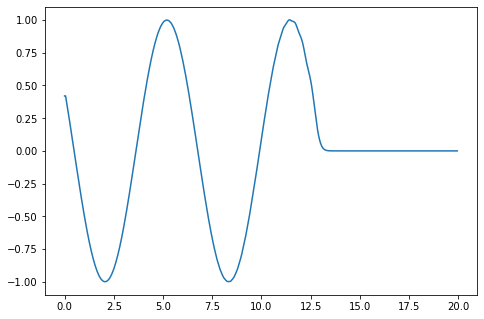

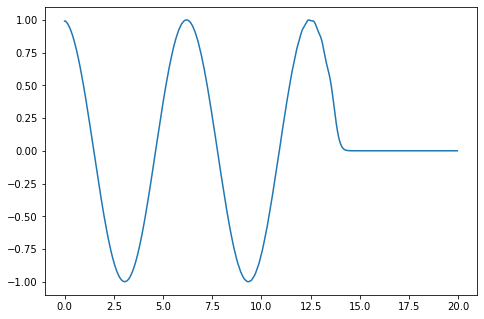

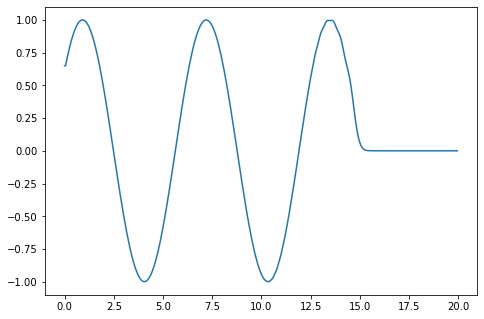

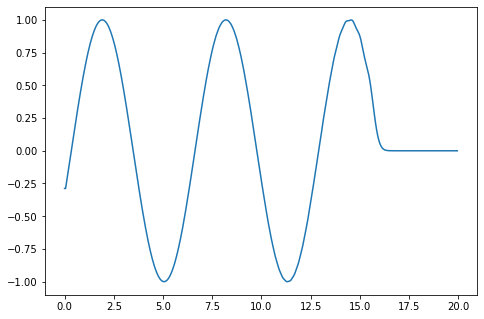

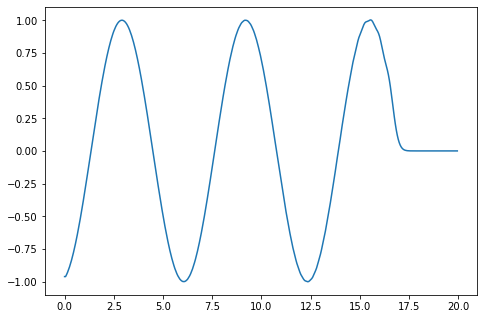

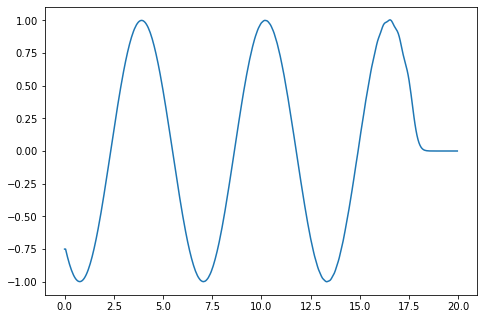

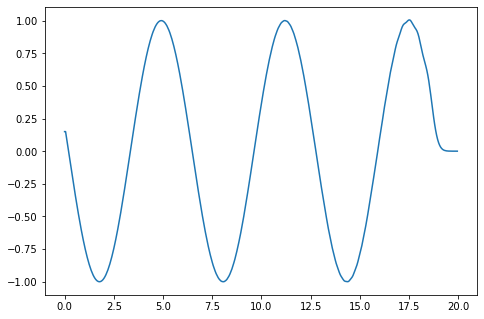

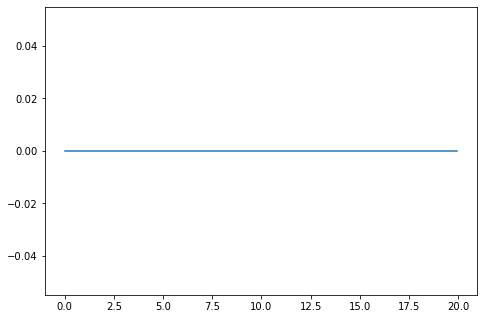

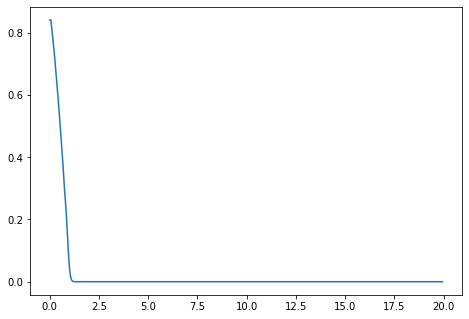

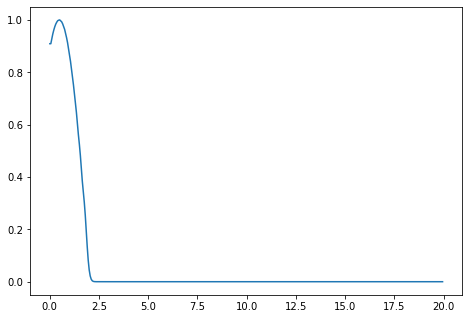

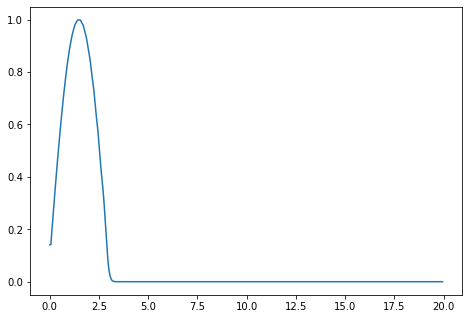

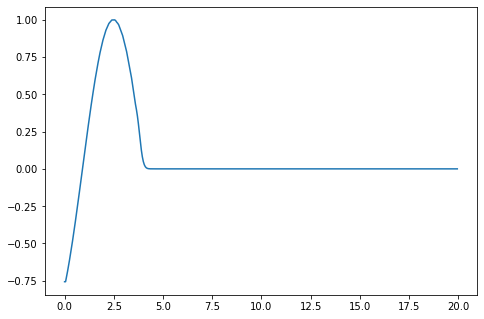

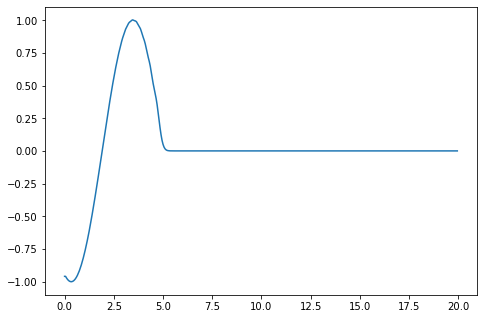

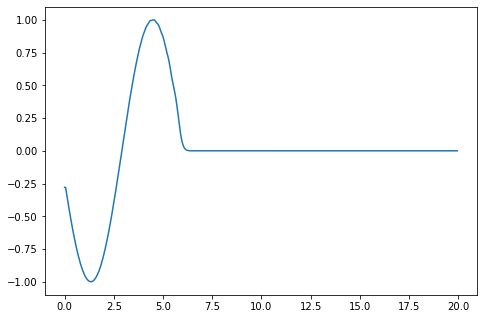

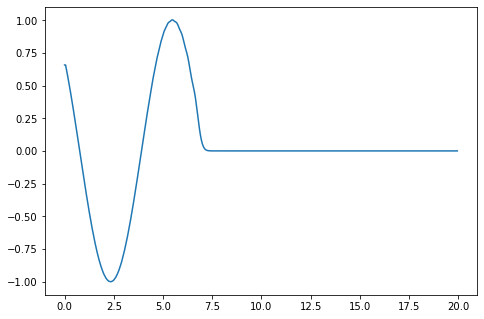

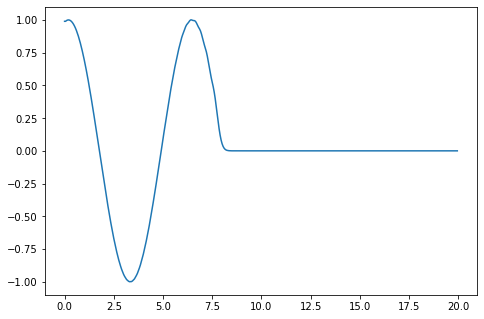

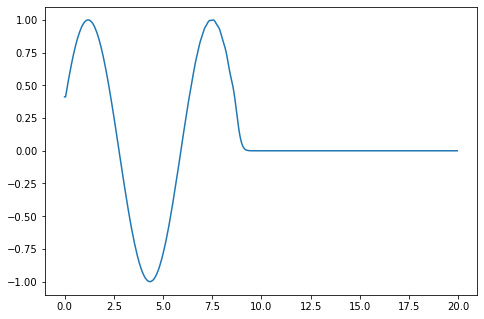

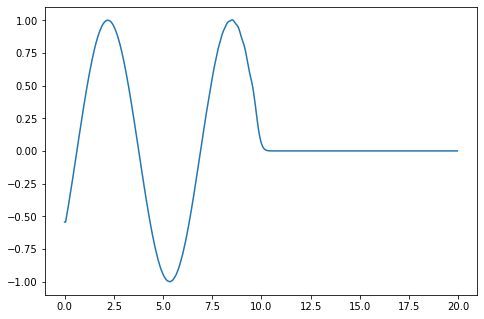

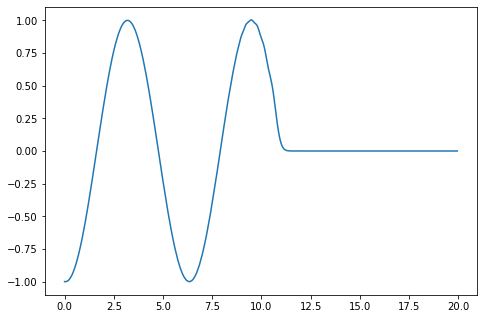

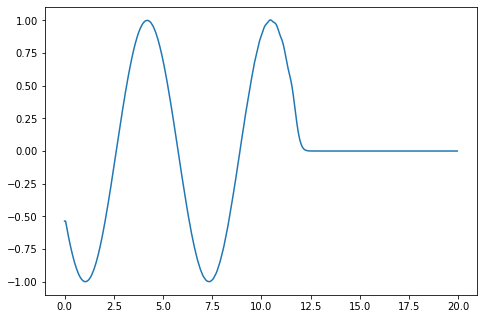

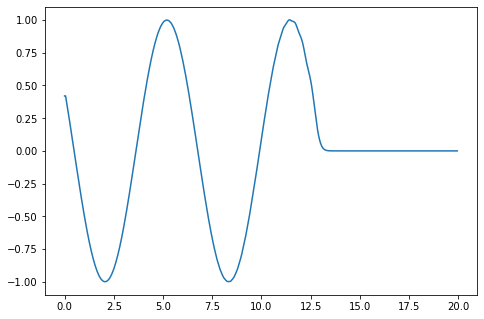

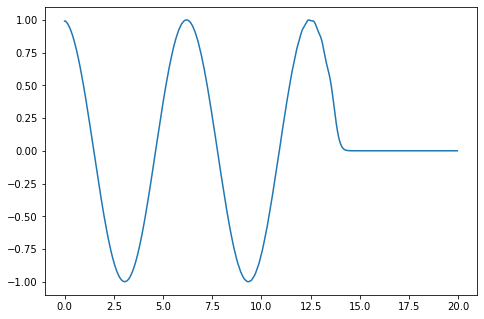

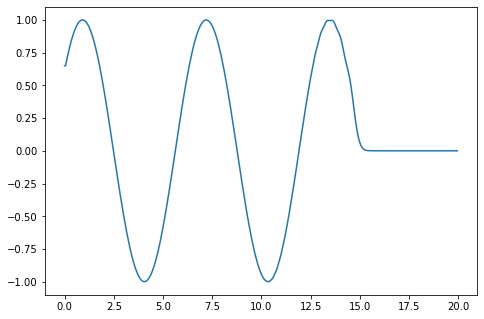

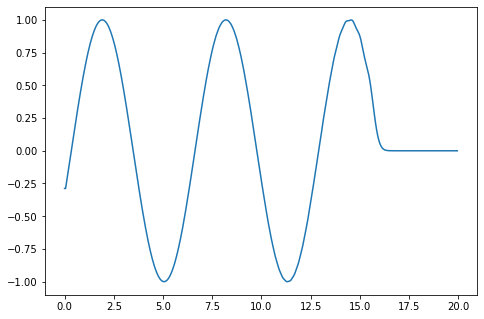

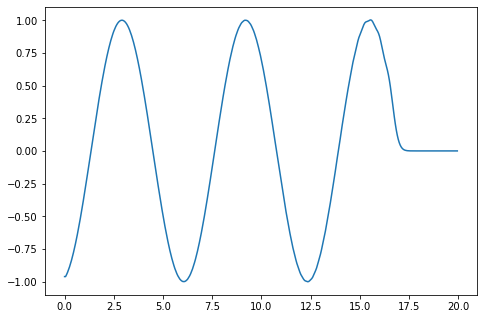

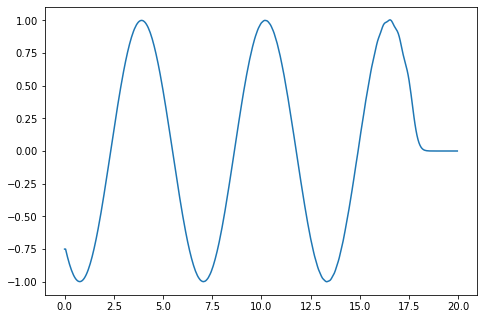

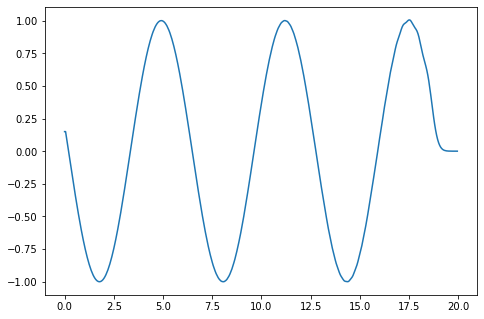

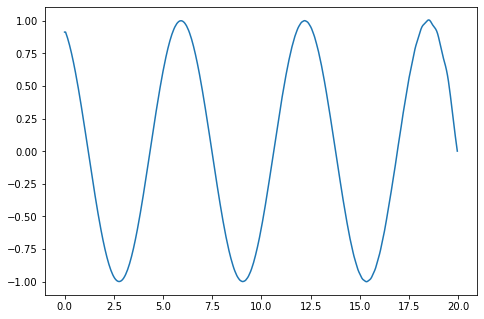

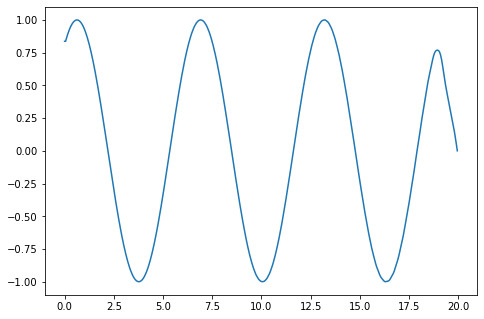

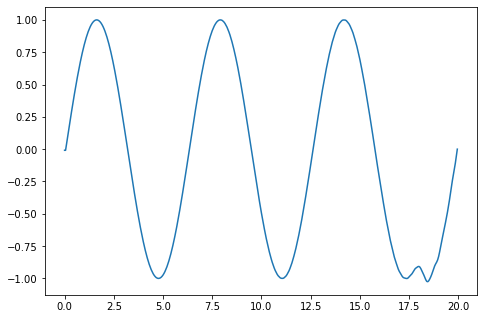

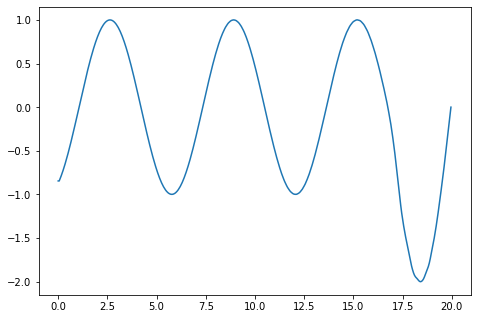

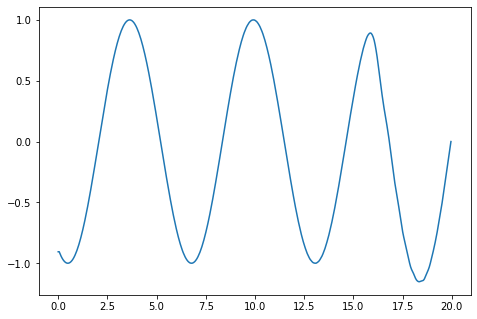

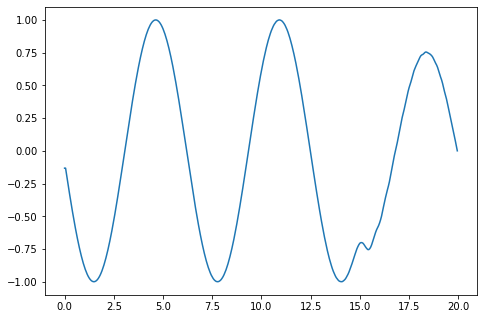

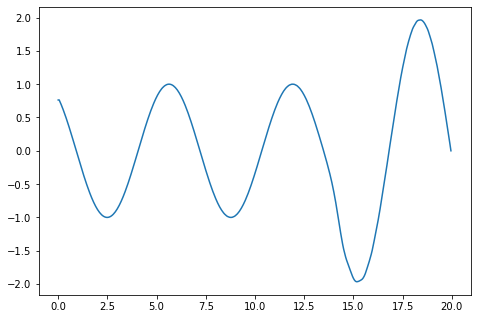

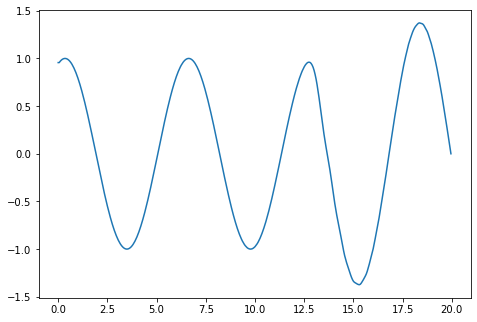

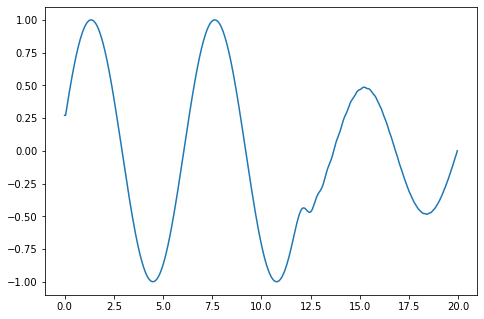

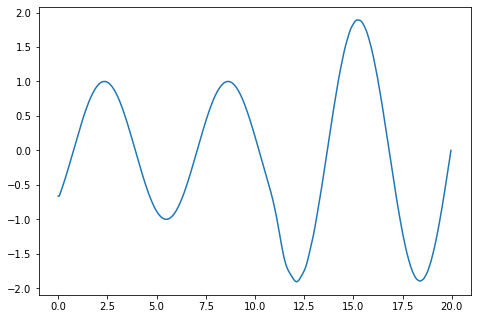

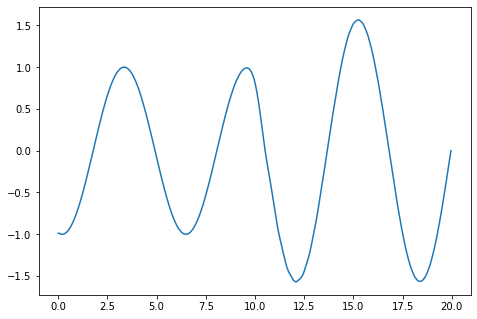

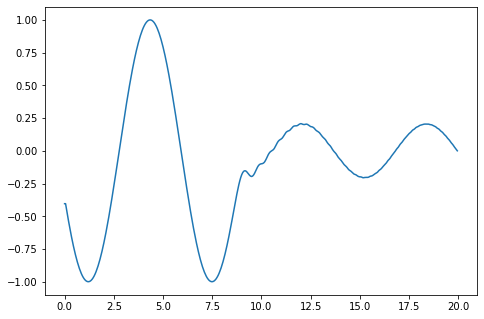

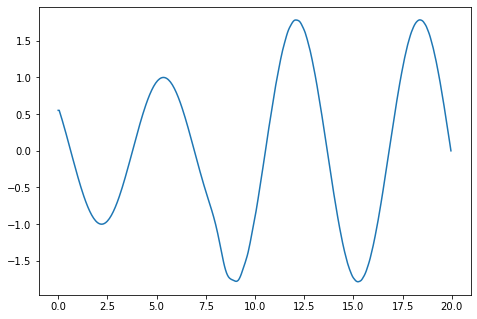

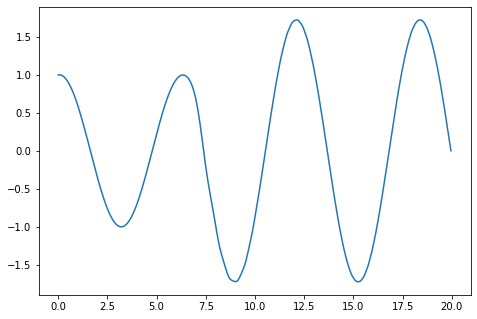

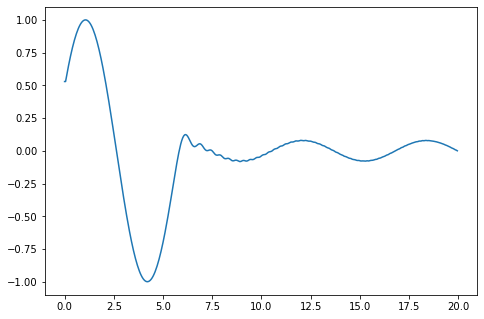

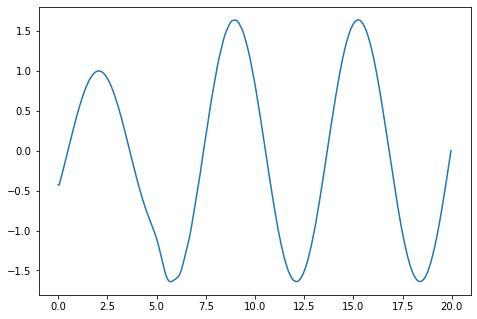

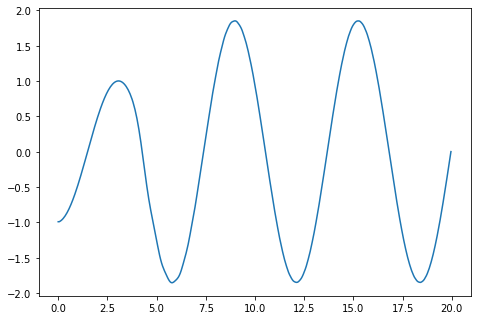

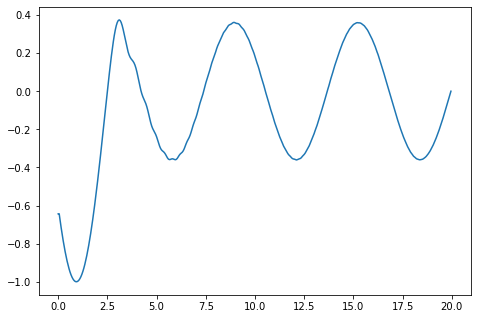

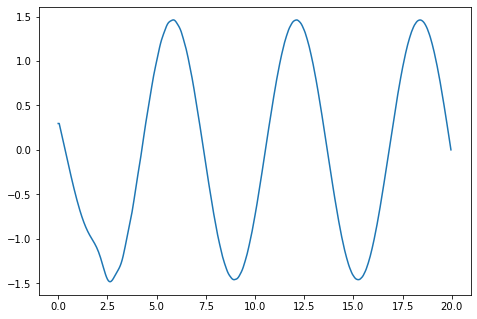

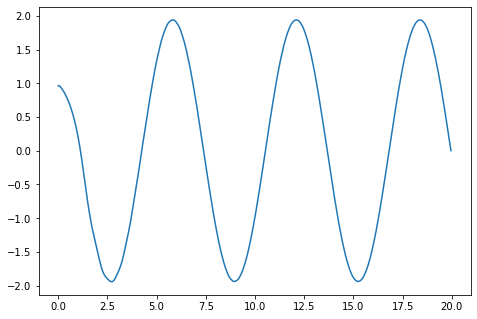

In [3]:
#Arrays and spacings
t = np.arange(0,20,0.01)
x = np.arange(0,20,0.05)
ht = 0.01
hx = 0.05

#Function to solve for a given value of x and t the displacement u
def Solver(x,t,hx,ht):
    #u array and dispAll to store all the u's
    u = np.zeros((len(x),len(t)))
    dispAll = np.zeros((len(x),len(t)))

    #Loop thru all x values for each value of t
    for j in range(0,t.size-1):
        #Initiate the intitial 2 points
        u[0,j] = u[1,j] = np.sin(t[j])
        for i in range(2,x.size-1):
            u[i,j+1] = ht**2*(u[i+1,j]-2*u[i,j]+u[i-1,j])/hx**2 + 2*u[i,j] - u[i,j-1]
        
        #Array that holds all the values for all x/t
        dispAll = np.append(dispAll,u[:,j])
        
        #If the 100th, plot
        if j%100 == 0:
            fig = plt.figure()
            ax = fig.add_axes([0,0,1,1])
            ax.plot(x,u[:,j])

#Lets make some cool graphs!
Solver(x,t,hx,ht)

t2 = np.arange(0,40,0.01)

Solver(x,t2,hx,ht)

#YES! Since it extends past the point where the wave reaches the right wall, it REBOUNDS! 
#This means that the reverb from the right hand wall starts to effect the oscillation pattern of the rope. 
#This can be seen in the 'disturbances' in the second half!
#The right side is treated as a fixed end, and an opposite reflection can be noted!

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.